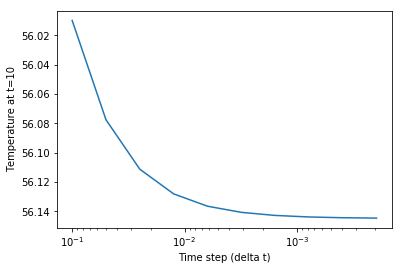

In [33]:
#To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at t=10 as a function of $\Delta t$.

import numpy as np 
import matplotlib.pyplot as plt

T0 = 10.   # initial temperature, float (temperature of the body at time t=0)
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt= 0.1
tmax = 10. # maximum time

euler = lambda y, f, dx: y + f*dx 

my_temp = np.zeros(10)
my_time = np.zeros(10) #different time steps 

#T = T0

for i in range(0, 10):
    nsteps = int(tmax/dt)
    time = np.linspace(dt,tmax,nsteps) 
    temp = np.zeros(nsteps)
    T = T0
    for k in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        temp[k] = T
        
    my_temp[i] = temp[-1]
    my_time[i] = dt #it loops over the range and produce diff time steps 
    dt = dt/2.
plt.semilogx(my_time, my_temp)

plt.gca().invert_xaxis() #inverted the axis to show approach asymptotically the value 
plt.gca().invert_yaxis()    
        

    

plt.xlabel('Time step (delta t)');
plt.ylabel('Temperature at t=10');
plt.show()

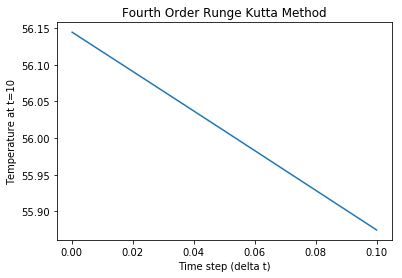

In [49]:
#Challenge 2.2 /////

#Repeat the calculation in Challenge 2.1 using 4th order Runge-Kutta

import numpy as np 
import matplotlib.pyplot as plt

def f(T_0):
    f = -r*(T_0-Ts)
    return f


def k1(T_0):#T0 is similar to y or the old value y_n at t_n (or x_n) and f is the slope or dT/dt , and dt is the step
    k1 = dt*f(T_0)
    return k1

def k2(T_0): 
    k2 = dt*f(T_0+(K1)/2)
    return k2


def k3(T_0): 
    k3 = dt*f(T_0+(K2)/2)
    return k3

def k4 (T_0): 
    k4 = dt*f(T_0+K3)
    return k4
def RK4 (T_0):
    T_new = T_0 + (1/6)*(K1+ 2*K2 + 2*K3 + K4)
    return T_new

T0 = 10.   # initial temperature, float (temperature of the body at time t=0)
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt= 0.1
tmax = 10. # maximum time

my_temp = np.zeros(10)
my_time = np.zeros(10) #different time steps 

for i in range(0, 10):
    nsteps = int(tmax/dt)
    time = np.linspace(dt,tmax,nsteps) 
    temp = np.zeros(nsteps)
    T = T0
    for j in range(1,nsteps):
        K1 = k1(T)
        K2 = k2(T)
        K3 = k3(T)
        K4 = k4(T)
        T = RK4(T)
        temp[j] = T
        
    my_temp[i] = temp[-1]
    my_time[i] = dt #it loops over the range and produce diff time steps 
    dt = dt/2.
plt.plot(my_time, my_temp)    

plt.xlabel('Time step (delta t)')
plt.ylabel('Temperature at t=10')
plt.title('Fourth Order Runge Kutta Method')
plt.show()





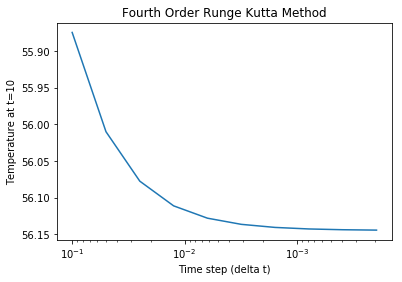

In [51]:
#Use log scale and flip axis to show approach asymptotically the value  

plt.semilogx(my_time, my_temp)
plt.xlabel('Time step (delta t)')
plt.ylabel('Temperature at t=10')
plt.title('Fourth Order Runge Kutta Method')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()  